# Import des bibliothèques et chargement des données

In [84]:
import pandas as pd
import dataiku
from dataiku import pandasutils as pdu
import matplotlib.pyplot as plt 
# Import des différents modèles 
from sklearn.linear_model import LogisticRegression, LinearRegression 
from sklearn.tree import DecisionTreeClassifier 
# Import de la fonction d'échantillonnage (split Train/Test)
from sklearn.model_selection import train_test_split
# Import des métriques d'évaluation 
from sklearn.metrics import classification_report, auc, confusion_matrix , accuracy_score, precision_score, recall_score, roc_curve

In [85]:
train = dataiku.Dataset("train")
test = dataiku.Dataset("test")

train = train.get_dataframe()
test = test.get_dataframe()

# Exploration 

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
columns = ["Pclass", "Survived", "Fare", "Parch"]
df_train = train[columns]

In [55]:
columns_without_target = ["Pclass", "Fare", "Parch"]
df_test = test[columns_without_target]

## Formalisation du problème 

In [56]:
X = df_train.drop(columns="Survived")
y = df_train[["Survived"]]

On peut vérifier les tailles de la matrice d'attributs X et du vecteur cible y 

In [57]:
X.shape

(891, 3)

In [58]:
y.shape

(891, 1)

## Division du dataset initial en jeu de données d'entraînement et jeu de données de test 

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# Modélisation 

<b>Useful links : </b>
    
<ol>
<li> <a href="https://www.kaggle.com/getting-started/154432">Kaggle Basic Machine Learning Algorithms - Cheat Sheet(s)</a> </li>
    <li> <a href="https://medium.com/machine-learning-in-practice/cheat-sheet-of-machine-learning-and-python-and-math-cheat-sheets-a4afe4e791b6">Machine in practices (cheat sheets)</a></li>
    <li> <a href="https://blog.dataiku.com/machine-learning-explained-algorithms-are-your-friend">Dataiku : Algorithms Are Your Friend </a></li>
</ol>
    

In [60]:
lr = LogisticRegression()

In [61]:
model_lr = lr.fit(X_train, y_train)

/data1/DATA_DIR/code-envs/python/Py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/data1/DATA_DIR/code-envs/python/Py36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
y_pred = model_lr.predict(X_test)

Pour voir les différents paramètres du modèle c'est à dire les différents theta, on applique la règle suivante. Chaque paramètre est compris entre -1 et 1. Il indique l'importance de chaque paramètre pour la prédiction de la cible. Plus le paramètre s'approche de -1 et 1 plus on dit qu'il est important et qu'il est corrélée (négativement pour -1 ou positivement pour 1) avec la cible. S'il se rapproche de 0, cela veut dire que le paramètre n'est pas du tout important dans la prédiction de la cible. 

In [63]:
model_lr.coef_

array([[-0.66387618,  0.00354749,  0.18777116]])

In [64]:
model_lr.intercept_

array([0.83816756])

Pour pouvoir regarder également les différentes probabilités des prédictions, on utilise la commande suivante :

In [65]:
y_pred_proba = model_lr.predict_proba(X_test)

In [66]:
y_pred_proba_df = pd.DataFrame(y_pred_proba, columns=["proba_0", "proba_1"])
y_pred_proba_df.head()

,proba_0,proba_1
0,0.750667,0.249333
1,0.755225,0.244775
2,0.703155,0.296845
3,0.333128,0.666872
4,0.673451,0.326549


La colonne "proba_0" indique la probabilité à appartenir à la classe 0 et la colonne "proba_1" indique la probabilité à appartenir à la classe 1. 

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       110
           1       0.70      0.46      0.56        69

   micro avg       0.72      0.72      0.72       179
   macro avg       0.71      0.67      0.67       179
weighted avg       0.71      0.72      0.70       179



- Arbre de décision 

In [68]:
decision_tree = DecisionTreeClassifier(max_depth=4)

In [69]:
model_dt = decision_tree.fit(X_train, y_train)

In [70]:
y_pred = decision_tree.predict(X_test)

In [71]:
model_dt.feature_importances_

array([0.43941318, 0.3489524 , 0.21163442])

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       110
           1       0.78      0.42      0.55        69

   micro avg       0.73      0.73      0.73       179
   macro avg       0.75      0.67      0.68       179
weighted avg       0.74      0.73      0.71       179



In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1], pos_label=1)

In [74]:
y_pred_proba_dt = decision_tree.predict_proba(X_test)

# Comparaison des modèles en utilisant l'aire sous la courbe ROC

In [75]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1], pos_label=1)

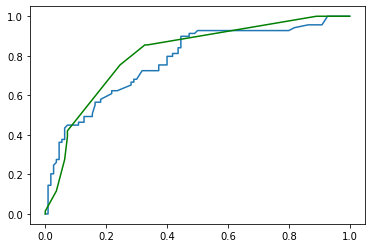

In [76]:
plt.plot(fpr, tpr)
plt.plot(fpr_dt, tpr_dt, 'g-')

In [77]:
print("L'aire sous la courbe pour la régression logistique est " + str(auc(fpr, tpr)))
print("L'aire sous la courbe pour l'arbre de décision est " + str(auc(fpr_dt, tpr_dt)))

L'aire sous la courbe pour la régression logistique est 0.7777997364953886
L'aire sous la courbe pour l'arbre de décision est 0.8091567852437417


In [78]:
from sklearn.preprocessing import OneHotEncoder 

In [79]:
encoder = OneHotEncoder()

In [80]:
train = train.dropna()

In [81]:
embarked = pd.get_dummies(train['Embarked'])

In [82]:
train = pd.concat([train, embarked], axis=1)

In [83]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0,0,1


## Going Beyond the notebook : Model Deployment

<b>Useful links : </b>
    
<ol>
<li> <a href="https://towardsdatascience.com/simple-way-to-deploy-machine-learning-models-to-cloud-fd58b771fdcf">Simple way to deploy machine learning models to cloud</a> </li>
<li> <a href="https://enterprise-docs.anaconda.com/en/docs-site-5.0.2/user-guide/tutorials/deploy-notebook-project.html">Deploying a Jupyter Notebook project</a></li>
<li> <a href="https://blog.dataiku.com/machine-learning-explained-algorithms-are-your-friend">Jupyter is Ready for Production; As Is</a></li>
<li> <a href="https://blog.dataiku.com/what-is-mlops-why-does-it-matter">What Is MLOps & Why It Matters More Than Ever</a> </li>
<li> <a href="https://blog.dataiku.com/mlops-basics-why-implement-mlops">MLOps Basics: Why Is Everyone Talking About It?</a></li>
<li> <a href="https://neptune.ai/blog/best-mlops-tools">The Best MLOps Tools You Need to Know as a Data Scientist</a></li>
</ol>

<b>Cheat sheets: </b>
<ol>
<li> <a href="https://www.utc.fr/~jlaforet/Suppl/python-cheatsheets.pdf"> Python for Data science Cheatsheets</a>  </li>
<li> <a href="https://www.thinkful.com/blog/data-scientist-cheat-sheet/">The Ultimate Cheat Sheet for Data Scientists</a> </li>
<li> <a href="https://github.com/jabhij/PY-Plotly_CheatSheet">jabhij/PY-Plotly_CheatSheet: A Python and Plotly ... - GitHub</a>  </li>
<li> <a href="https://www.datacamp.com/community/blog/python-matplotlib-cheat-sheet">Matplotlib Cheat Sheet: Plotting in Python</a>  </li>
<li> <a href="https://policyviz.com/wp-content/uploads/2018/08/PolicyViz-DataViz-Cheatsheet.pdf"> DataViz Cheatsheet v5.3</a>  </li>

</ol>